# **Title: Customer Churn Prediction Analysis Using Ensemble Techniques in Machine Learning**

**Description:** Customers are a company's most valuable asset, and maintaining customers is critical for any organisation looking to increase revenue and develop long-term meaningful relationships with customers. Furthermore, the cost of obtaining a new client is five times that of keeping an existing customer. Customer Churn/Attrition is one of the most well-known business difficulties in which consumers or subscribers discontinue doing business with a service or a firm. Ideally, they will no longer be a paying customer. A client is considered to have been churned if a certain length of time has passed since the consumer last interacted with the company. Identifying whether or not a client will churn and offering relevant information aimed at customer retention are crucial to lowering churn. Our brains cannot anticipate customer turnover for millions of clients; here is where machine learning may assist. 

**Dataset:** https://www.kaggle.com/code/kerneler/starter-wafn-usec-telco-customer-05c825b4-5/data


In [ ]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,f1_score,precision_score,recall_score,fbeta_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import seaborn as sns

In [ ]:
#importing the dataset
data = pd.read_csv("Customer-Churn.csv")
data

### EDA
Dataset comprises of 7043 observations and 21 characteristics.
Out of which one is dependent variable and rest 20 are independent variables

In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


`info()` gives information about the columns and their corresponding data types.

Here, Data has float, integer and string values.

In [ ]:
#dropping customer ID because it's not required
data.drop(columns=['customerID'],inplace=True)
#changing feature "TotalCharges" to numeric type
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
#Removing duplicates
data.drop_duplicates(inplace=True)
#creating a copy
data_copy = data.copy()
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
print("Description of Categorical Data: \n")
data_copy.astype('object').describe().transpose()

Description of Categorical Data: 



,count,unique,top,freq
gender,7021,2,Male,3541
SeniorCitizen,7021,2,0,5880
Partner,7021,2,No,3619
Dependents,7021,2,No,4911
tenure,7021,73,1,591
PhoneService,7021,2,Yes,6339
MultipleLines,7021,3,No,3368
InternetService,7021,3,Fiber optic,3090
OnlineSecurity,7021,3,No,3490
OnlineBackup,7021,3,No,3080


In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7010.000000
mean,0.162512,32.469449,64.851894,2290.353388
std,0.368947,24.534965,30.069001,2266.820832
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,55.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


The `describe()` function is used for getting various summary statistics. This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

Before encoding the data, we only have 4 numerical variables out of which `SeniorCitizen` is already encoded in the dataset where, 

1: Senior Citizen

0: Not a Senior Citizen

In [ ]:
#Data Cleaning
null_values=np.sum(data.isnull())
null_values

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 null values present in the dataset for the column TotalCharges and 

1.   List item
2.   List item

it has to be removed.

In [ ]:
data.dropna(inplace = True)
data.shape

(7010, 20)

Drop the rows where there are null values. 11 rows are dropped.

### Label Encoding

In [ ]:
cols = [col for col in data if data[col].dtype == 'object']

for each_col in cols:
    le = LabelEncoder()
    data[each_col] = le.fit_transform(data[each_col])
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [ ]:
x = data.columns.values
x = np.delete(x,len(x)-1)
x_variable = data[x]
x_variable

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [ ]:
y_variable = data['Churn']
y_variable

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7010, dtype: int64

### Normalization

In [ ]:
#Analysing the range
x_variable.max()-x_variable.min()

gender                 1.0
SeniorCitizen          1.0
Partner                1.0
Dependents             1.0
tenure                71.0
PhoneService           1.0
MultipleLines          2.0
InternetService        2.0
OnlineSecurity         2.0
OnlineBackup           2.0
DeviceProtection       2.0
TechSupport            2.0
StreamingTV            2.0
StreamingMovies        2.0
Contract               2.0
PaperlessBilling       1.0
PaymentMethod          3.0
MonthlyCharges       100.5
TotalCharges        8666.0
dtype: float64

In [ ]:
#Normalization by MinMax
column='TotalCharges'
x_variable[column] = MinMaxScaler().fit_transform(np.array(x_variable[column]).reshape(-1,1))
column='MonthlyCharges'
x_variable[column] = MinMaxScaler().fit_transform(np.array(x_variable[column]).reshape(-1,1))
column='tenure'
x_variable[column] = MinMaxScaler().fit_transform(np.array(x_variable[column]).reshape(-1,1))
x_variable

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0.000000,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275
1,1,0,0,0,0.464789,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867
2,1,0,0,0,0.014085,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310
3,1,0,0,0,0.619718,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241
4,0,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,2,0,2,0,2,2,2,2,1,1,3,0.662189,0.227521
7039,0,0,1,1,1.000000,1,2,1,0,2,2,0,2,2,1,1,1,0.845274,0.847461
7040,0,0,1,1,0.140845,0,1,0,2,0,0,0,0,0,0,1,2,0.112935,0.037809
7041,1,1,1,0,0.042254,1,2,1,0,0,0,0,0,0,0,1,3,0.558706,0.033210


### Outlier 


In [ ]:
numerical = [col for col in data_copy if data_copy[col].dtype != 'object'][1:]
for col in numerical:
    q1 = x_variable[col].quantile(0.25)
    q3 = x_variable[col].quantile(0.75)
    IQR = q3 - q1
    out_less = x_variable[x_variable[col] < (q1 - 1.5*IQR)]
    out_more = x_variable[x_variable[col] > (q3 + 1.5*IQR)]
    outliers = pd.concat([out_less, out_more])
    print(outliers)

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges]
Index: []
Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges]
Index: []
Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges]
Index: []


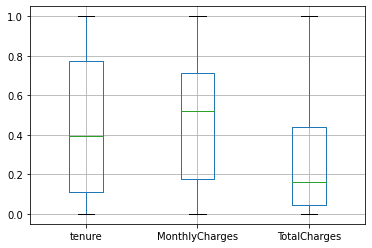

In [ ]:
x_variable.boxplot(numerical)
plt.show()

There are no outliers in the dataset as shown in the boxplot. Hence, no rows need to be removed from the dataset.

> Indented block



### Visualization
1. Heat map
2. Correlation
3. Dist plot
4. Count plot

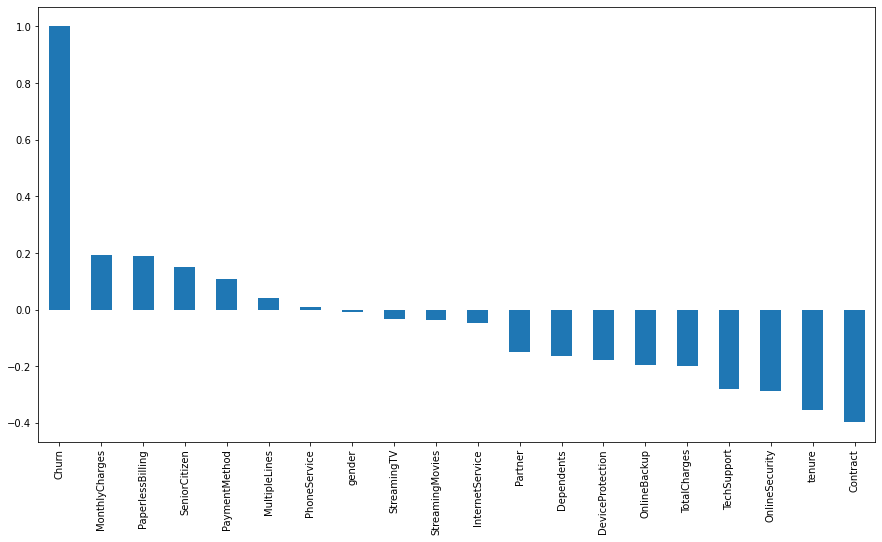

In [ ]:
plt.figure(figsize=(15,8))
data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**The** correlation of all independent columns are taken with respect to the dependent variable 'Churn' and plotted in a sorted manner.

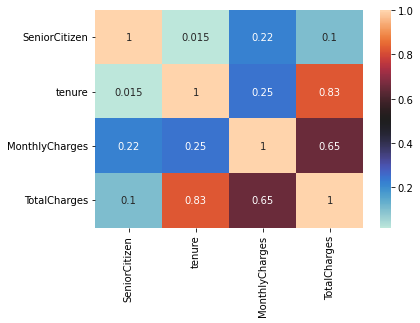

In [ ]:
cor = data_copy.corr()
sns.heatmap(cor,cmap='icefire',annot=True)

Heat map for all numerical variables in the original dataset before encoding that describes correlation.

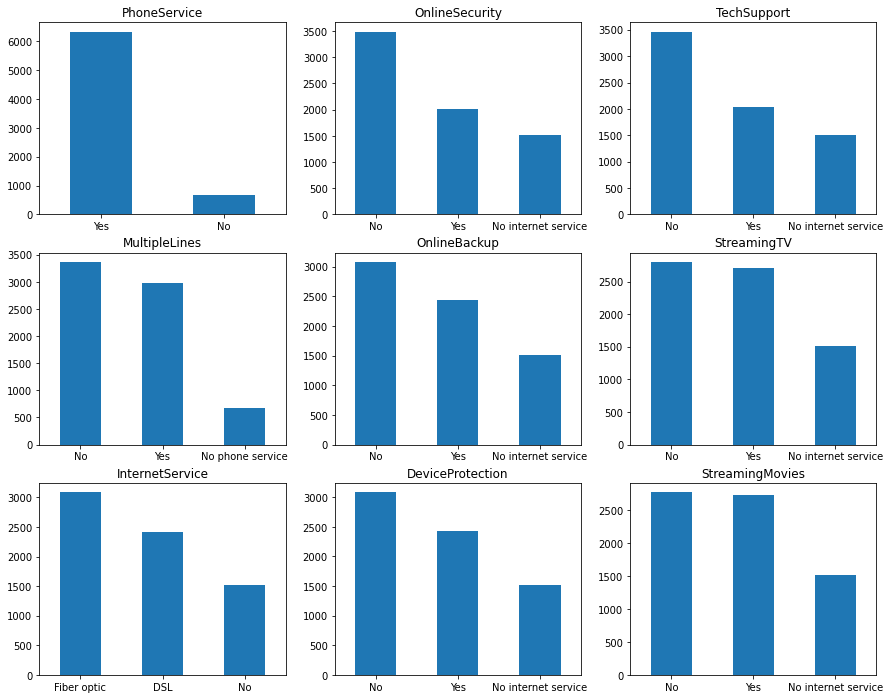

In [ ]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = data_copy[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = data_copy[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = data_copy[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

Bar chart for all the services used by customers.

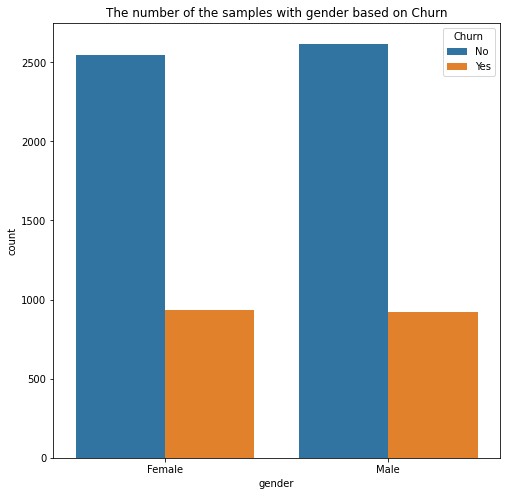

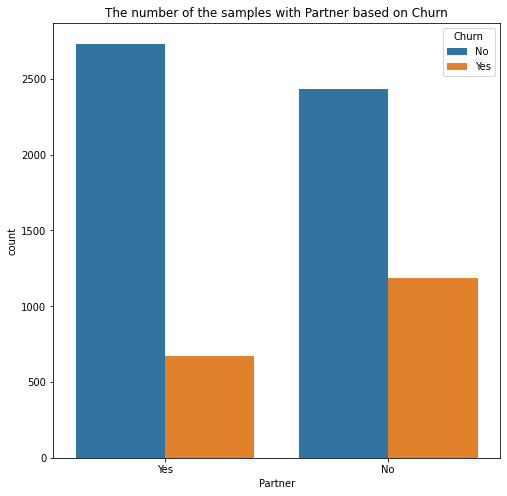

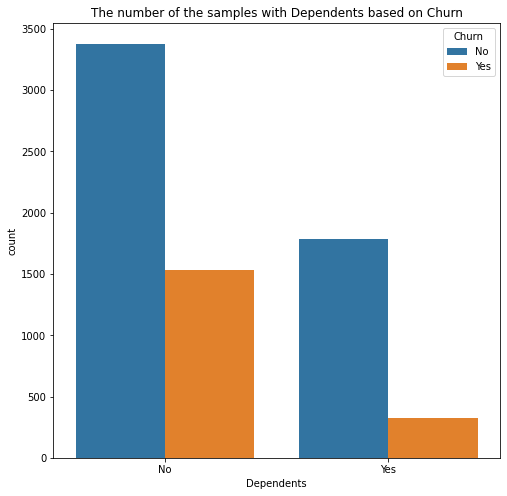

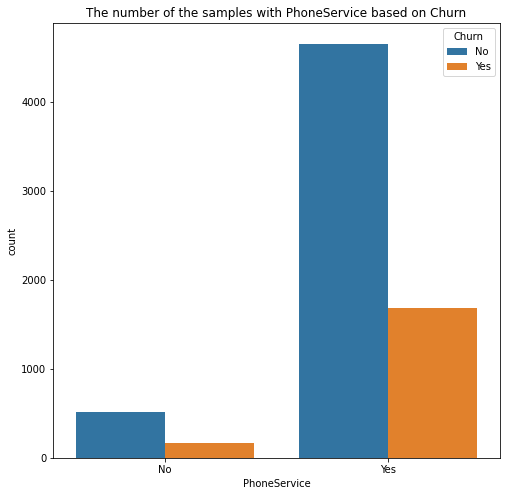

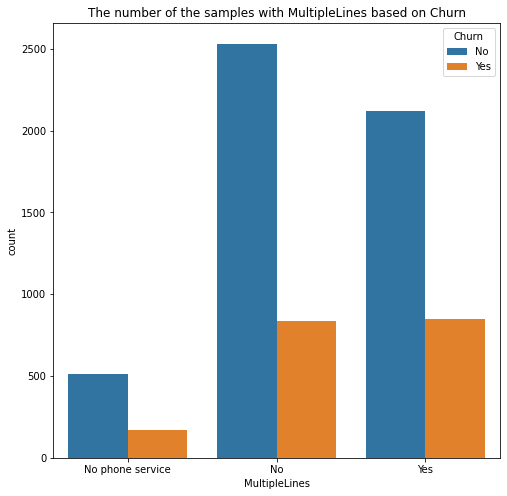

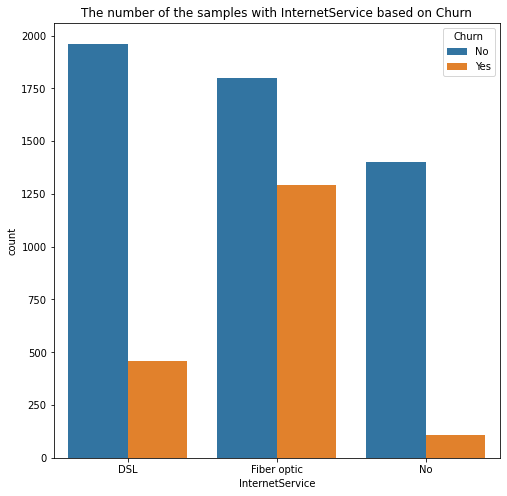

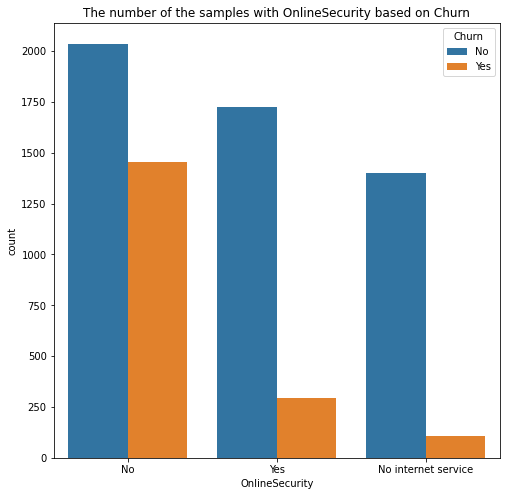

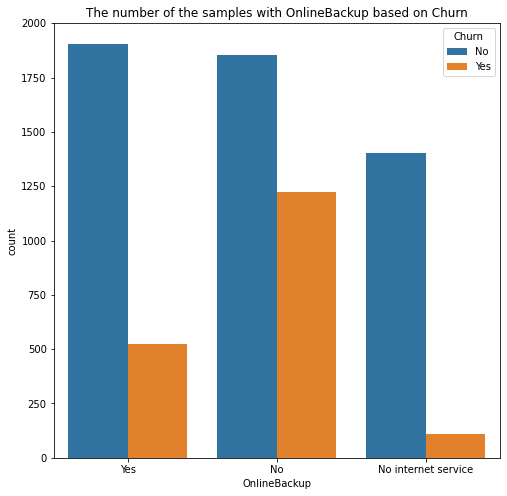

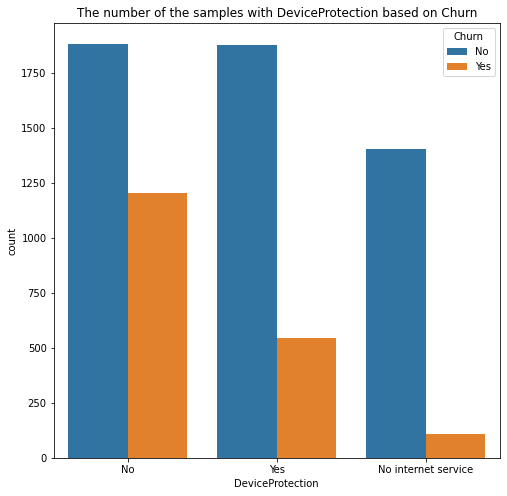

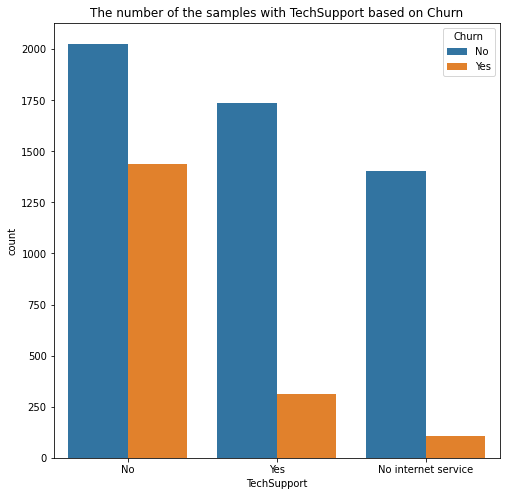

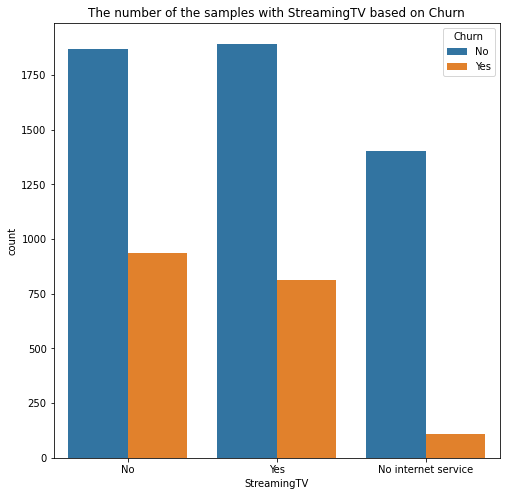

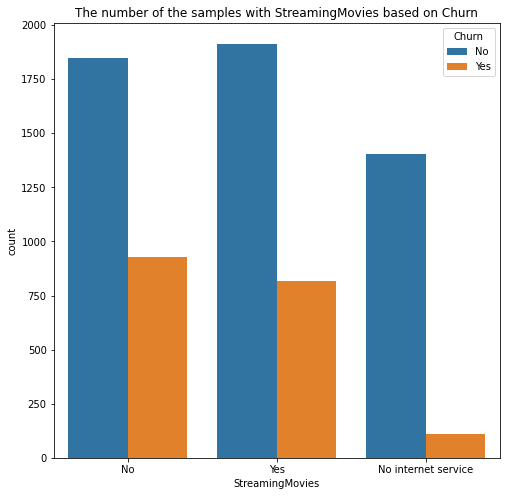

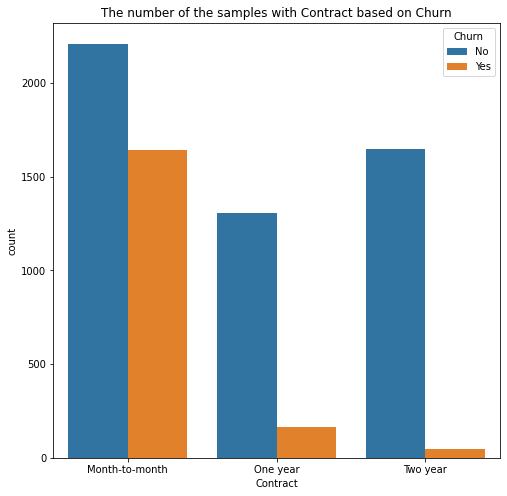

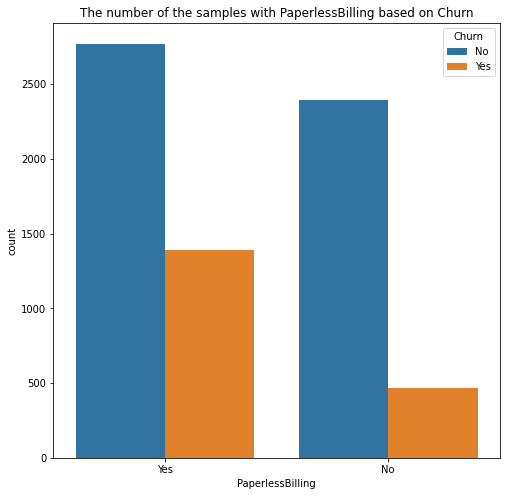

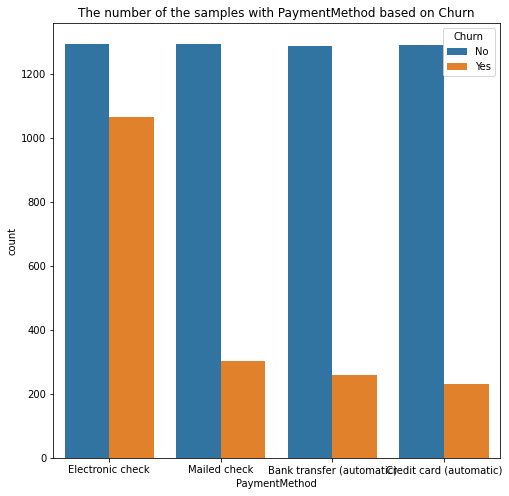

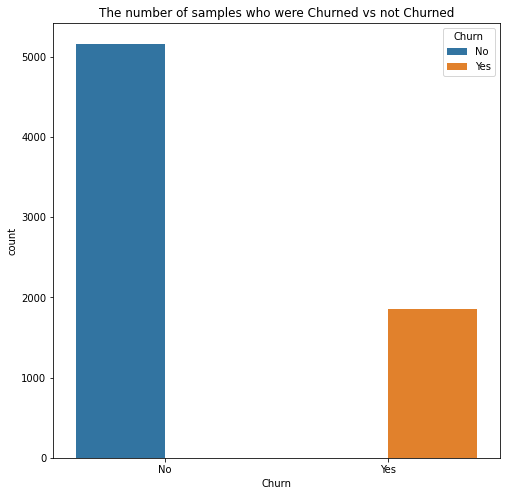

In [ ]:
for i in data_copy.columns[:]:
  if (data_copy[i].dtype == 'object'):
    plt.figure(figsize=(8,8))
    sns.countplot(data = data_copy, x = i, hue = 'Churn')
    if(i == 'Churn'):
      plt.title("The number of samples who were Churned vs not Churned".format(i))
    else:
      plt.title("The number of the samples with {} based on Churn".format(i))
    plt.show()

Count plots that show whether a customer churned or not grouped by several categories. For example, shows the number of Males and Females churned.

The last plot shows the total number of customers churned vs customers who didn't churn.

### Feature Selection
1. Reduces Overfitting: Less redundant data means less possibility of making decisions based on redundant data/noise.
2. Improves Accuracy: Less misleading data means modeling accuracy improves.
3. Reduces Training Time: Less data means that algorithms train faster.

In [ ]:
# We just select 17 top features from the data set
x_new = SelectKBest(mutual_info_classif, k=19).fit(x_variable, y_variable)
selected_columns = x_variable.columns[x_new.get_support()]
x_variable_selected = x_variable[list(selected_columns)]
x_variable_selected


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0.000000,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275
1,1,0,0,0,0.464789,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867
2,1,0,0,0,0.014085,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310
3,1,0,0,0,0.619718,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241
4,0,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,2,0,2,0,2,2,2,2,1,1,3,0.662189,0.227521
7039,0,0,1,1,1.000000,1,2,1,0,2,2,0,2,2,1,1,1,0.845274,0.847461
7040,0,0,1,1,0.140845,0,1,0,2,0,0,0,0,0,0,1,2,0.112935,0.037809
7041,1,1,1,0,0.042254,1,2,1,0,0,0,0,0,0,0,1,3,0.558706,0.033210


# **MODELS**

In [ ]:
#Spliting Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(x_variable_selected, y_variable, test_size=0.3,shuffle=True,random_state=42)

from collections import Counter

print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 3589, 1: 1318})
Testing target statistics: Counter({0: 1564, 1: 539})
Training target statistics: Counter({0: 3589, 1: 3589})
Testing target statistics: Counter({0: 1564, 1: 539})


In [ ]:
#1. Logistic Regression
model = LogisticRegression()
result = model.fit(X_res, y_res)
prediction_test = model.predict(X_test)
# Print the prediction accuracy
#print (accuracy_score(y_test, prediction_test))
print (f1_score(y_test, prediction_test))
print (precision_score(y_test, prediction_test))
print (recall_score(y_test, prediction_test))
print (fbeta_score(y_test, prediction_test,beta=2))

0.6188466947960619
0.4983012457531144
0.8163265306122449
0.723922342875946


Since the dataset is unbalaced, the evaluation metrics has to be F1 Score, Precision and Recall scores.While Accuracy is used for Balanced Data.

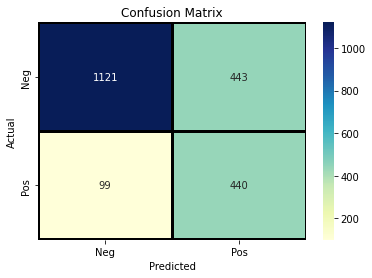


Classification Report-->

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1564
           1       0.50      0.82      0.62       539

    accuracy                           0.74      2103
   macro avg       0.71      0.77      0.71      2103
weighted avg       0.81      0.74      0.76      2103



In [ ]:
cm = confusion_matrix(y_test,prediction_test)
cr = classification_report(y_test,prediction_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()
print()
print('Classification Report-->\n')
print(cr)

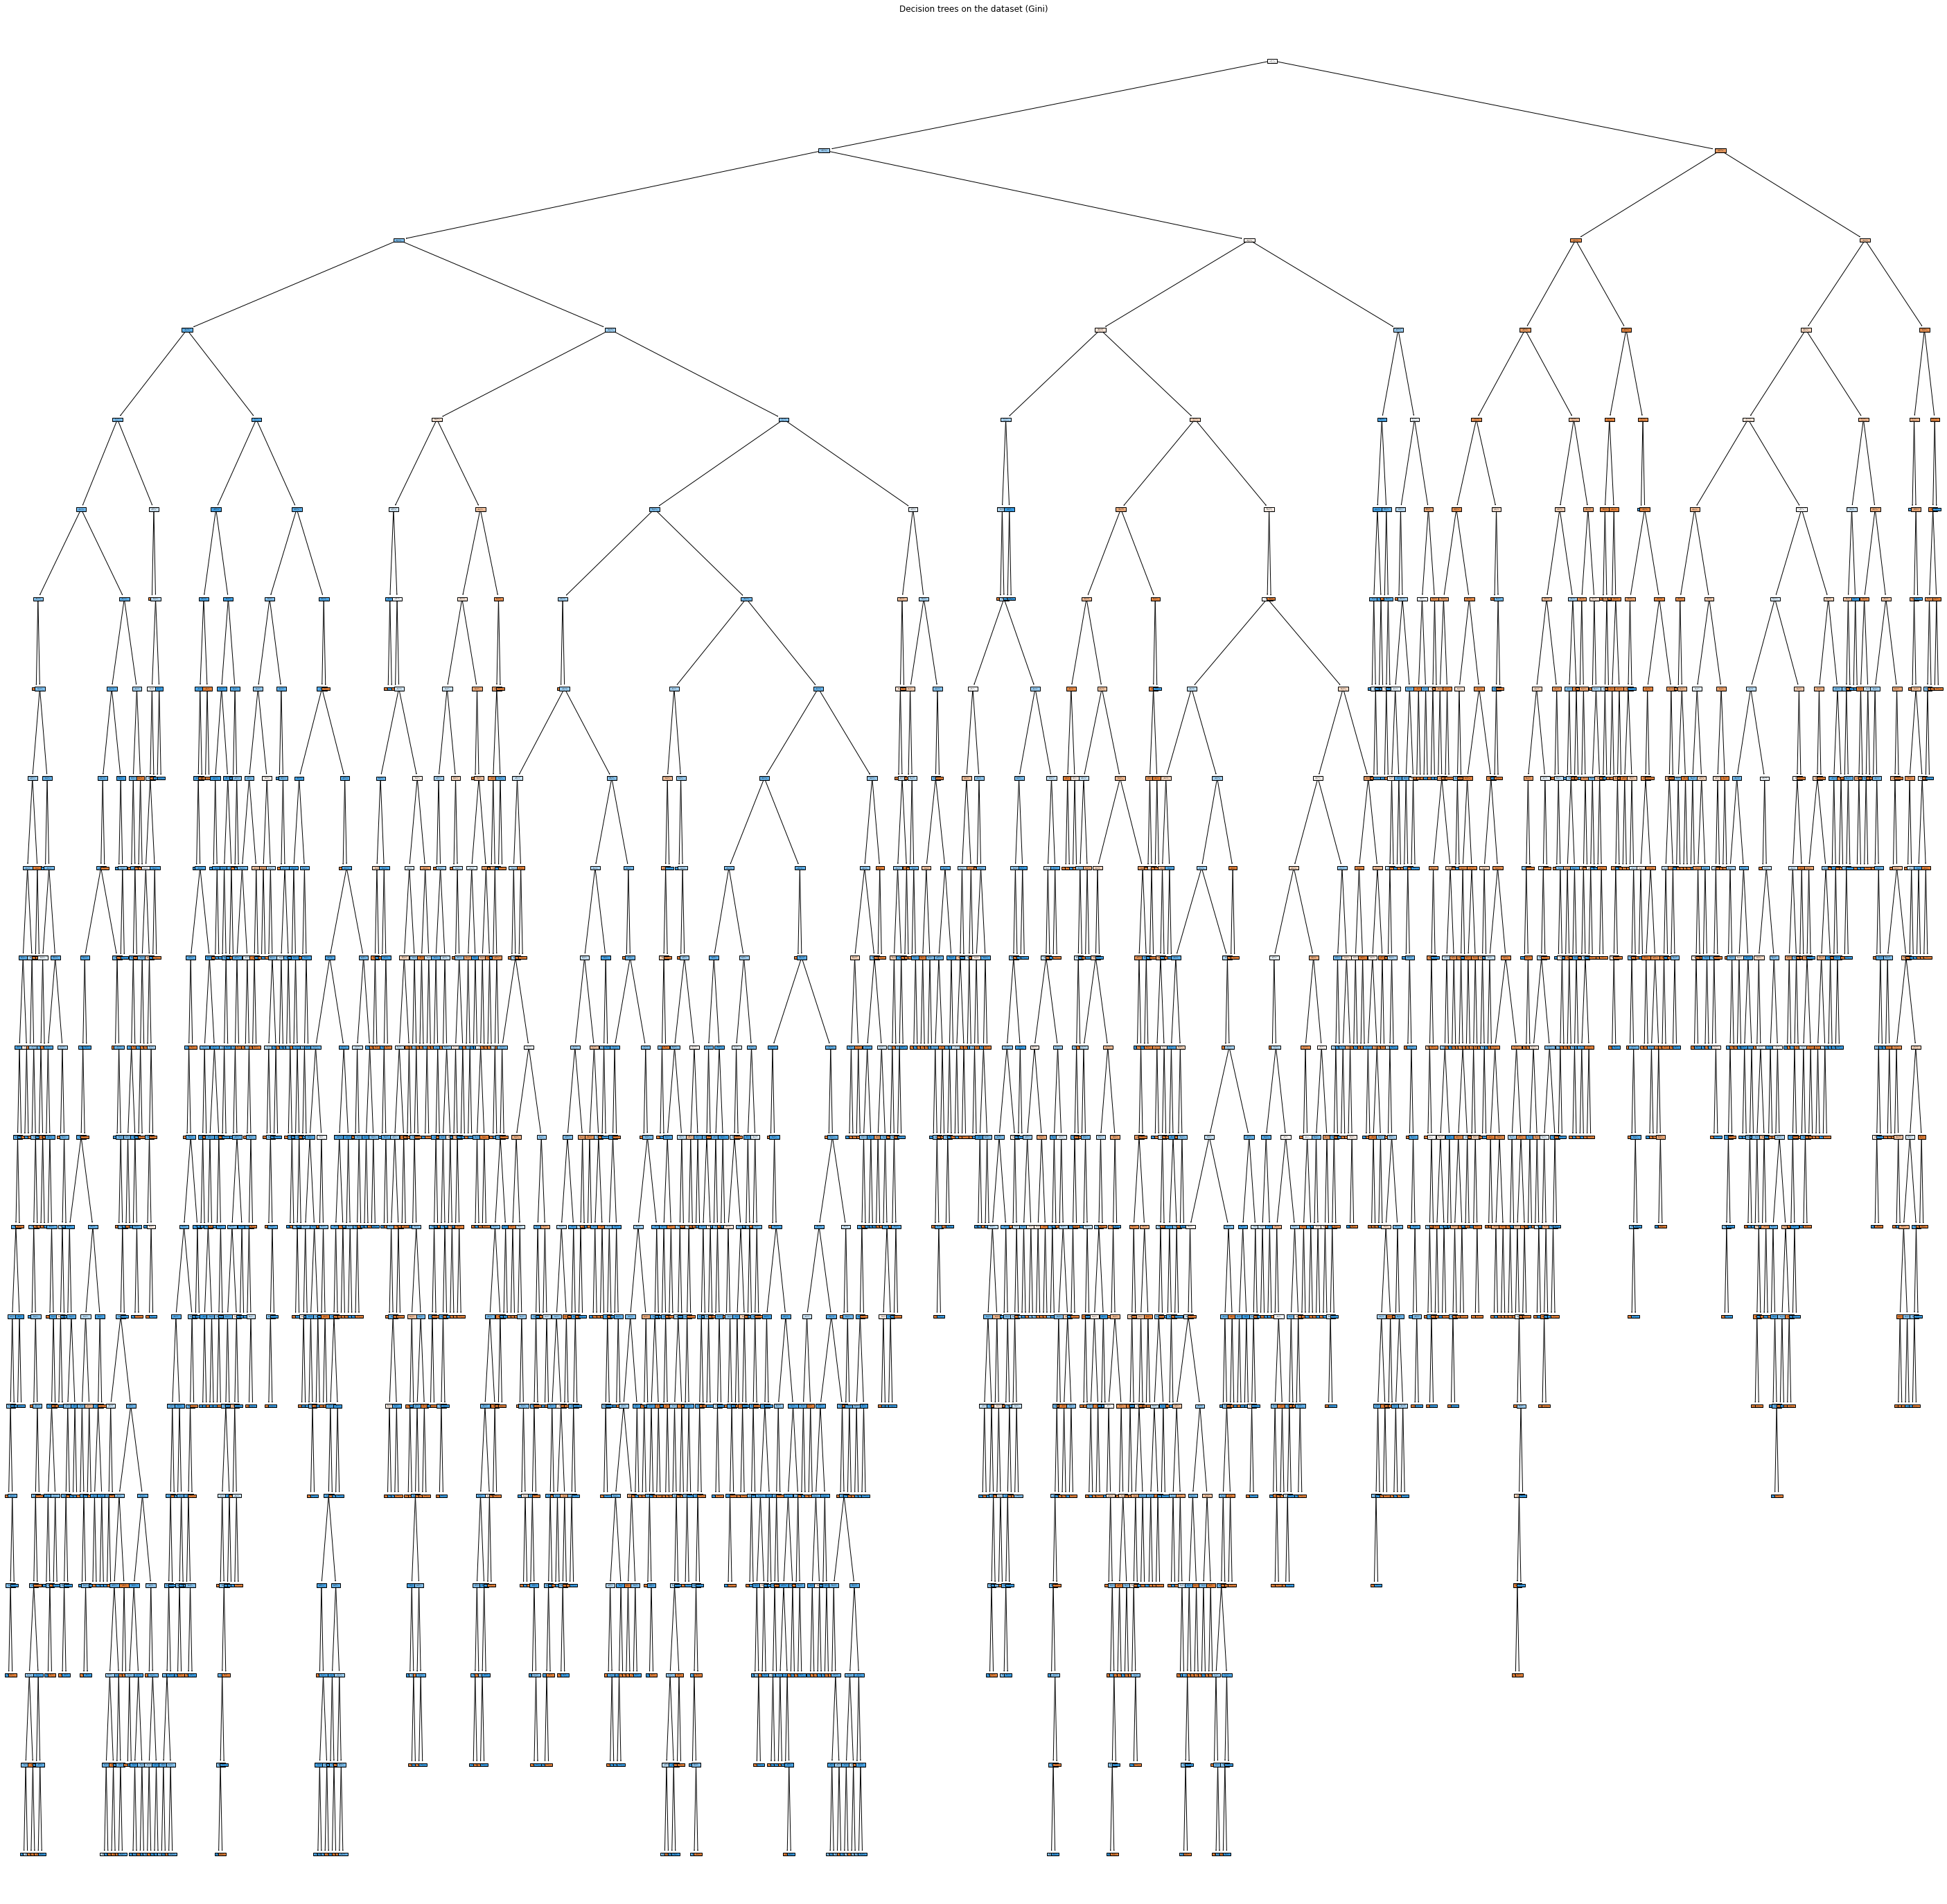

0.4942196531791907
0.4609164420485175
0.5327102803738317
0.5166163141993958


In [ ]:
#2. decision Tree
X_train, X_test, y_train, y_test = train_test_split(x_variable_selected, y_variable, test_size=0.2,shuffle=True,random_state=42)
model = DecisionTreeClassifier(criterion="gini",max_depth=20,class_weight="balanced")
result = model.fit(X_train, y_train)

plt.figure(figsize=(50, 50))
tree.plot_tree(model, feature_names=selected_columns, filled=True)
plt.title("Decision trees on the dataset (Gini)")
plt.show()

prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (f1_score(y_test, prediction_test))
print (precision_score(y_test, prediction_test))
print (recall_score(y_test, prediction_test))
print (fbeta_score(y_test, prediction_test,beta=2))

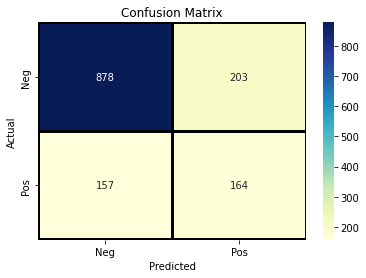


Classification Report-->

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1081
           1       0.45      0.51      0.48       321

    accuracy                           0.74      1402
   macro avg       0.65      0.66      0.65      1402
weighted avg       0.76      0.74      0.75      1402



In [ ]:
cm = confusion_matrix(y_test,prediction_test)
cr = classification_report(y_test,prediction_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()
print()
print('Classification Report-->\n')
print(cr)


In [ ]:
#3. Random Forest
X_train, X_test, y_train, y_test = train_test_split(x_variable_selected, y_variable, test_size=0.3, random_state=42)
model_rf = RandomForestClassifier(n_estimators=300 ,oob_score="True", max_depth=15, random_state =42, max_features = "auto",
                                  max_leaf_nodes = 15)
model_rf.fit(X_res, y_res)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (f1_score(y_test, prediction_test))
print (precision_score(y_test, prediction_test))
print (recall_score(y_test, prediction_test))
print (fbeta_score(y_test, prediction_test,beta=2))

0.6163793103448276
0.5029308323563892
0.7959183673469388
0.7128614157527416


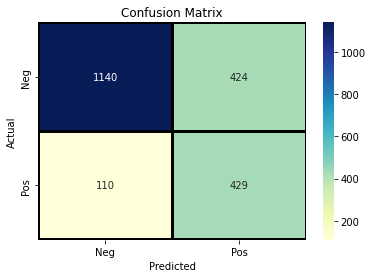


Classification Report-->

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1564
           1       0.50      0.80      0.62       539

    accuracy                           0.75      2103
   macro avg       0.71      0.76      0.71      2103
weighted avg       0.81      0.75      0.76      2103



In [ ]:
cm = confusion_matrix(y_test,prediction_test)
cr = classification_report(y_test,prediction_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()
print()
print('Classification Report-->\n')
print(cr)


In [ ]:
#4. Naive bayes
X_train, X_test, y_train, y_test = train_test_split(x_variable_selected, y_variable, test_size=0.25, random_state=101)

model=GaussianNB()
model.fit(X_res,y_res)
prediction_test = model_rf.predict(X_test)
print (f1_score(y_test, prediction_test))
print (precision_score(y_test, prediction_test))
print (recall_score(y_test, prediction_test))
print (fbeta_score(y_test, prediction_test,beta=2))

0.6384083044982699
0.5294117647058824
0.803921568627451
0.7283853138570864


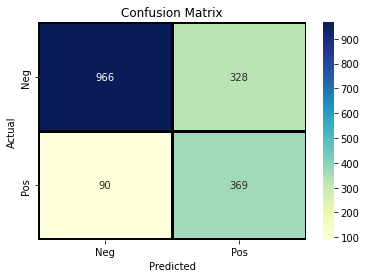


Classification Report-->

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1294
           1       0.53      0.80      0.64       459

    accuracy                           0.76      1753
   macro avg       0.72      0.78      0.73      1753
weighted avg       0.81      0.76      0.77      1753



In [ ]:
cm = confusion_matrix(y_test,prediction_test)
cr = classification_report(y_test,prediction_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()
print()
print('Classification Report-->\n')
print(cr)


In [ ]:
#5. KNN
X_train, X_test, y_train, y_test = train_test_split(x_variable_selected, y_variable, test_size=0.3, random_state=101)

K = []
training = []
test = []
scores = {}

for k in range(2, 31):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_res, y_res)

    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)

    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.8997350723456287, 0.8972895863052782]
3 : [0.7988587731811697, 0.8107465525439848]
4 : [0.8055838597921336, 0.8135996195910604]
5 : [0.7466884043203587, 0.755587256300523]
6 : [0.771550845730589, 0.7669995244888255]
7 : [0.7360912981455064, 0.7356157869709938]
8 : [0.757693091501936, 0.7598668568711364]
9 : [0.7252904014672916, 0.734189253447456]
10 : [0.746077032810271, 0.7584403233475987]
11 : [0.7203994293865906, 0.7351402757964812]
12 : [0.7352761361320562, 0.7484545886828341]
13 : [0.7159160383126146, 0.7280076081787922]
14 : [0.7279396780110047, 0.738944365192582]
15 : [0.708171999184838, 0.7213504517356157]
16 : [0.722029753413491, 0.7346647646219686]
17 : [0.7110250662319136, 0.7142177841179268]
18 : [0.7210108008966782, 0.7308606752258678]
19 : [0.7079682086814755, 0.7165953399904897]
20 : [0.7187691053596902, 0.7327627199239182]
21 : [0.7063378846545751, 0.7161198288159771]
22 : [0.7165274098227022, 0.7242035187826914]
23 : [0.7022620745873243, 0.708036138849263]
24 : 

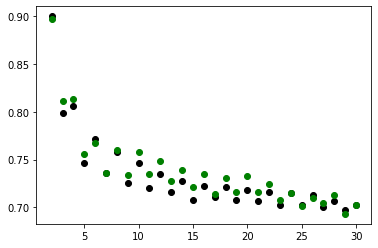

In [ ]:
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

In [ ]:
model = KNeighborsClassifier(n_neighbors = 30)
model.fit(X_train, y_train)
prediction_test = model.predict(X_test)
print (f1_score(y_test, prediction_test))
print (precision_score(y_test, prediction_test))
print (recall_score(y_test, prediction_test))
print (fbeta_score(y_test, prediction_test,beta=2))

0.5395537525354971
0.6143187066974596
0.4810126582278481
0.502835538752363


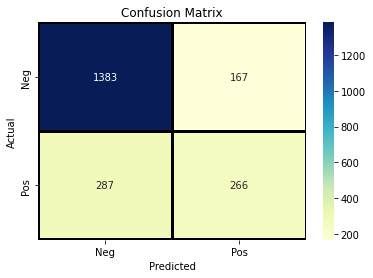


Classification Report-->

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1550
           1       0.61      0.48      0.54       553

    accuracy                           0.78      2103
   macro avg       0.72      0.69      0.70      2103
weighted avg       0.77      0.78      0.78      2103



In [ ]:
cm = confusion_matrix(y_test,prediction_test)
cr = classification_report(y_test,prediction_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()
print()
print('Classification Report-->\n')
print(cr)


In [ ]:
#6. XG Boost
X_train, X_test, y_train, y_test = train_test_split(x_variable_selected, y_variable, test_size=0.25, random_state=101)

model = XGBClassifier()
model.fit(X_res, y_res)
prediction_test = model.predict(X_test)
print (f1_score(y_test, prediction_test))
print (precision_score(y_test, prediction_test))
print (recall_score(y_test, prediction_test))
print (fbeta_score(y_test, prediction_test,beta=2))

0.6491228070175439
0.5433186490455213
0.8061002178649237
0.7350019864918554


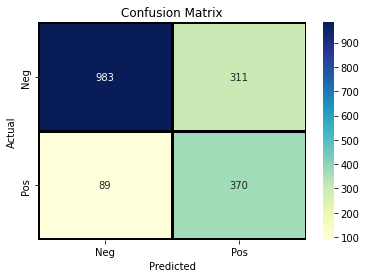


Classification Report-->

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1294
           1       0.54      0.81      0.65       459

    accuracy                           0.77      1753
   macro avg       0.73      0.78      0.74      1753
weighted avg       0.82      0.77      0.78      1753



In [ ]:
cm = confusion_matrix(y_test,prediction_test)
cr = classification_report(y_test,prediction_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()
print()
print('Classification Report-->\n')
print(cr)


After analysing the performance of various Machine Learning models to predict the Churn rate we observe that the Ensemble models- XG Boost and Naive Bay's Classifier works the best.